# HW 4-6
## Twitter Data Analysis
Data source: http://help.sentiment140.com/for-students/

### Part 1: Word relationship analysis with bigrams
We want to see how the words in tweets are inter-related.

In [139]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk import bigrams

import itertools
import collections
import networkx as nx


from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.decomposition import PCA

In [140]:
df = pd.read_csv('testdata.manual.2009.06.14.csv',header = None)
df.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [141]:
doc = df[[3,5]]
doc.head()

,3,5
0,kindle2,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,kindle2,Reading my kindle2... Love it... Lee childs i...
2,kindle2,"Ok, first assesment of the #kindle2 ...it fuck..."
3,kindle2,@kenburbary You'll love your Kindle2. I've had...
4,kindle2,@mikefish Fair enough. But i have the Kindle2...


In [142]:
tweets = doc[5].tolist()
tweets

['@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.',
 'Reading my kindle2...  Love it... Lee childs is good read.',
 'Ok, first assesment of the #kindle2 ...it fucking rocks!!!',
 "@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)",
 "@mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)",
 "@richardebaker no. it is too big. I'm quite happy with the Kindle2.",
 'Fuck this economy. I hate aig and their non loan given asses.',
 'Jquery is my new best friend.',
 'Loves twitter',
 'how can you not love Obama? he makes jokes about himself.',
 "Check this video out -- President Obama at the White House Correspondents' Dinner http://bit.ly/IMXUM",
 "@Karoli I firmly believe that Obama/Pelosi have ZERO desire to be civil.  It's a charade and a slogan, but they want to destroy conservatism",
 'House Correspondents dinner 

In [143]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Remove URLs
tweets_no_urls = [remove_url(tweet) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kharr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['stellargirl',
  'loooooooovvvvvveee',
  'kindle2',
  'dx',
  'cool',
  '2',
  'fantastic',
  'right'],
 ['reading', 'kindle2', 'love', 'lee', 'childs', 'good', 'read'],
 ['ok', 'first', 'assesment', 'kindle2', 'fucking', 'rocks'],
 ['kenburbary',
  'youll',
  'love',
  'kindle2',
  'ive',
  'mine',
  'months',
  'never',
  'looked',
  'back',
  'new',
  'big',
  'one',
  'huge',
  'need',
  'remorse'],
 ['mikefish', 'fair', 'enough', 'kindle2', 'think', 'perfect'],
 ['richardebaker', 'big', 'im', 'quite', 'happy', 'kindle2'],
 ['fuck', 'economy', 'hate', 'aig', 'non', 'loan', 'given', 'asses'],
 ['jquery', 'new', 'best', 'friend'],
 ['loves', 'twitter'],
 ['love', 'obama', 'makes', 'jokes'],
 ['check',
  'video',
  'president',
  'obama',
  'white',
  'house',
  'correspondents',
  'dinner'],
 ['karoli',
  'firmly',
  'believe',
  'obamapelosi',
  'zero',
  'desire',
  'civil',
  'charade',
  'slogan',
  'want',
  'destroy',
  'conservatism'],
 ['house',
  'correspondents',
  'dinne

In [144]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

terms_bigram[0]

[('stellargirl', 'loooooooovvvvvveee'),
 ('loooooooovvvvvveee', 'kindle2'),
 ('kindle2', 'dx'),
 ('dx', 'cool'),
 ('cool', '2'),
 ('2', 'fantastic'),
 ('fantastic', 'right')]

In [145]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(30)

[(('time', 'warner'), 32),
 (('night', 'museum'), 26),
 (('twitter', 'api'), 12),
 (('malcolm', 'gladwell'), 10),
 (('museum', '2'), 10),
 (('last', 'night'), 9),
 (('san', 'francisco'), 9),
 (('star', 'trek'), 8),
 (('bobby', 'flay'), 8),
 (('north', 'korea'), 6),
 (('warner', 'cable'), 6),
 (('warren', 'buffet'), 6),
 (('going', 'see'), 5),
 (('see', 'star'), 5),
 (('viral', 'marketing'), 5),
 (('see', 'night'), 5),
 (('love', 'love'), 5),
 (('danny', 'gokey'), 4),
 (('new', 'blog'), 4),
 (('blog', 'post'), 4),
 (('east', 'palo'), 4),
 (('palo', 'alto'), 4),
 (('goodby', 'silverstein'), 4),
 (('new', 'night'), 4),
 (('love', 'kindle2'), 3),
 (('dont', 'want'), 3),
 (('lets', 'go'), 3),
 (('booz', 'allen'), 3),
 (('allen', 'hamilton'), 3),
 (('post', 'nike'), 3)]

In [146]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(time, warner)",32
1,"(night, museum)",26
2,"(twitter, api)",12
3,"(malcolm, gladwell)",10
4,"(museum, 2)",10
5,"(last, night)",9
6,"(san, francisco)",9
7,"(star, trek)",8
8,"(bobby, flay)",8
9,"(north, korea)",6


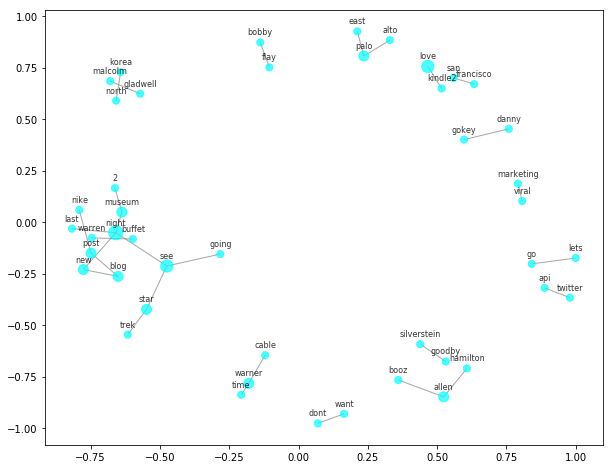

In [147]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 alpha=0.7,
                 node_size=[val*50 for (node, val) in G.degree()],
                 edge_color='grey',
                 node_color='cyan',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.05
nx.draw_networkx_labels(G, pos, font_size = 8, font_family='sans-serif', alpha=0.8)
    
plt.show()

### Part 2: Hashtag count
Here we investigate which hashtags were used most in the given tweets.

In [148]:
tag_list = []

for tweet in tweets:
    tags = [i  for i in tweet.split() if i.startswith("#") ]
    tag_list += tags

tag_list

['#kindle2',
 '#lebron',
 '#ttiv',
 '#Adidas',
 '#Billups',
 '#Howard',
 '#Marketing',
 '#Branding',
 '#p2',
 '#bipart',
 '#tlot',
 '#tcot',
 '#hhrs',
 '#GOP',
 '#DNC',
 '#mostvaluablepuppets',
 '#googleio',
 '#imgsearch',
 '#ajax',
 '#jquery',
 '#webapp',
 '#javascript',
 '#css',
 '#jquery',
 '#d-bags',
 '#at&amp;t',
 '#att',
 '#wolfram',
 '#google',
 '#wikipedia,',
 '#jobs',
 '#sittercity',
 '#MBA',
 '#stanford',
 '#socialentrepreneurship',
 '#webdesign',
 '#io2009',
 '#googleio',
 '#GoogleIO',
 '#tcot',
 '#ala',
 '#RantsAndRaves',
 '#WFTB',
 '#business',
 '#china',
 '#io2009',
 '#wave',
 '#Kindle2',
 '#iranelection',
 '#flockofseagullsweregeopoliticallycorrect']

In [149]:
tag_list_count = collections.Counter(tag_list)

tag_df = pd.DataFrame(tag_list_count.most_common(),
                             columns=['tags', 'count'])

tag_df.head()

,tags,count
0,#tcot,2
1,#googleio,2
2,#jquery,2
3,#io2009,2
4,#kindle2,1


The top hashtags from the file are given in the data frame above. Note that since the data only contains 500 tweets, the number of hashtags are also limited, hashtag duplicates also rarely occur.

### Part 3: TF-IDF and PCA
We want to see how the tweets (grouped by topic, originally provided in dataset for machine learning purposes) would look like if the groups are plotted.

In [150]:
vectorizer = CountVectorizer()  
x = vectorizer.fit_transform(tweets)  
word = vectorizer.get_feature_names()  
 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(x)

In [151]:
ftrs = tfidf.toarray()
lbls = doc[3].unique()

In [152]:
pca = PCA(n_components=2)
transData = pca.fit_transform(ftrs, lbls)

doc['pca1'] = pd.DataFrame(transData[:,0])
doc['pca2'] = pd.DataFrame(transData[:,1])
doc.head()

C:\Users\kharr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kharr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,3,5,pca1,pca2
0,kindle2,@stellargirl I loooooooovvvvvveee my Kindle2. ...,0.075503,-0.169599
1,kindle2,Reading my kindle2... Love it... Lee childs i...,0.025286,-0.161506
2,kindle2,"Ok, first assesment of the #kindle2 ...it fuck...",0.060572,-0.069884
3,kindle2,@kenburbary You'll love your Kindle2. I've had...,0.019047,-0.114276
4,kindle2,@mikefish Fair enough. But i have the Kindle2...,0.080328,-0.078057


C:\Users\kharr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


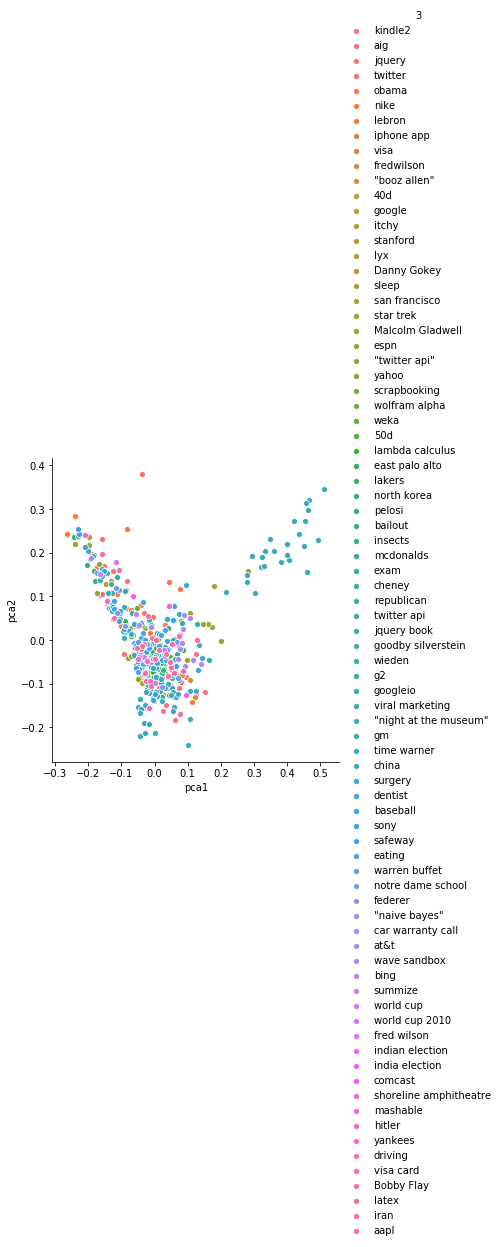

In [153]:
sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=doc, hue = 3, size=5)

In [154]:
temp = doc[doc['pca1']>0.3]
temp

,3,5,pca1,pca2
124,"""night at the museum""",watching Night at The Museum . Lmao,0.466215,0.321901
125,"""night at the museum""",i loved night at the museum!!!,0.511427,0.346972
126,"""night at the museum""",going to see the new night at the museum movi...,0.405535,0.184534
127,"""night at the museum""",just got back from the movies. went to see th...,0.493039,0.229336
128,"""night at the museum""",Just saw the new Night at the Museum movie...i...,0.435348,0.243349
129,"""night at the museum""",Going to see night at the museum 2 with tall boy,0.453077,0.272720
130,"""night at the museum""",@shannyoday I will take you on a date to see n...,0.302319,0.107928
131,"""night at the museum""",no watching The Night At The Museum. Getting R...,0.450542,0.216616
133,"""night at the museum""",saw night at the museum 2 last night.. pretty ...,0.398597,0.220659
134,"""night at the museum""",I saw Night at the Museum: Battle of the Swith...,0.320463,0.166822


Referring to the graph, the tweets are pretty much spread out, except for the blue points where pca1 > 0.3.
Upon filtering, we can see that all these points corresponds to the topic "night at the museum", indicating that these tweets are more like each other than any other tweets.